# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
from dqn_agent import Agent
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="../Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
k=0
while k < 500:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                            # roll over the state to next time step
    k += 1
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

#env.close()

Score: 0.0


When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [6]:
agent = Agent(state_size=state_size,
              action_size=action_size,
              seed=0)

In [7]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=15.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'model.pth')
    return scores

In [8]:
env_info = env.reset(train_mode=True)[brain_name]
scores = dqn()

Episode 100	Average Score: 1.33
Episode 200	Average Score: 4.80
Episode 300	Average Score: 8.38
Episode 400	Average Score: 10.90
Episode 500	Average Score: 12.68
Episode 600	Average Score: 14.69
Episode 612	Average Score: 15.03
Environment solved in 512 episodes!	Average Score: 15.03
Episode 619	Average Score: 15.02
Environment solved in 519 episodes!	Average Score: 15.02
Episode 620	Average Score: 15.01
Environment solved in 520 episodes!	Average Score: 15.01
Episode 700	Average Score: 14.02
Episode 800	Average Score: 14.60
Episode 822	Average Score: 15.01
Environment solved in 722 episodes!	Average Score: 15.01
Episode 823	Average Score: 15.01
Environment solved in 723 episodes!	Average Score: 15.01
Episode 824	Average Score: 15.01
Environment solved in 724 episodes!	Average Score: 15.01
Episode 825	Average Score: 15.02
Environment solved in 725 episodes!	Average Score: 15.02
Episode 826	Average Score: 15.13
Environment solved in 726 episodes!	Average Score: 15.13
Episode 827	Average

Episode 908	Average Score: 15.92
Environment solved in 808 episodes!	Average Score: 15.92
Episode 909	Average Score: 15.94
Environment solved in 809 episodes!	Average Score: 15.94
Episode 910	Average Score: 15.89
Environment solved in 810 episodes!	Average Score: 15.89
Episode 911	Average Score: 15.89
Environment solved in 811 episodes!	Average Score: 15.89
Episode 912	Average Score: 15.93
Environment solved in 812 episodes!	Average Score: 15.93
Episode 913	Average Score: 16.02
Environment solved in 813 episodes!	Average Score: 16.02
Episode 914	Average Score: 16.03
Environment solved in 814 episodes!	Average Score: 16.03
Episode 915	Average Score: 15.92
Environment solved in 815 episodes!	Average Score: 15.92
Episode 916	Average Score: 15.79
Environment solved in 816 episodes!	Average Score: 15.79
Episode 917	Average Score: 15.75
Environment solved in 817 episodes!	Average Score: 15.75
Episode 918	Average Score: 15.77
Environment solved in 818 episodes!	Average Score: 15.77
Episode 91

Episode 1000	Average Score: 15.85

Environment solved in 900 episodes!	Average Score: 15.85
Episode 1001	Average Score: 15.85
Environment solved in 901 episodes!	Average Score: 15.85
Episode 1002	Average Score: 15.84
Environment solved in 902 episodes!	Average Score: 15.84
Episode 1003	Average Score: 15.83
Environment solved in 903 episodes!	Average Score: 15.83
Episode 1004	Average Score: 15.89
Environment solved in 904 episodes!	Average Score: 15.89
Episode 1005	Average Score: 15.91
Environment solved in 905 episodes!	Average Score: 15.91
Episode 1006	Average Score: 15.95
Environment solved in 906 episodes!	Average Score: 15.95
Episode 1007	Average Score: 15.91
Environment solved in 907 episodes!	Average Score: 15.91
Episode 1008	Average Score: 15.88
Environment solved in 908 episodes!	Average Score: 15.88
Episode 1009	Average Score: 15.88
Environment solved in 909 episodes!	Average Score: 15.88
Episode 1010	Average Score: 15.92
Environment solved in 910 episodes!	Average Score: 15.9

Episode 1091	Average Score: 15.89
Environment solved in 991 episodes!	Average Score: 15.89
Episode 1092	Average Score: 15.89
Environment solved in 992 episodes!	Average Score: 15.89
Episode 1093	Average Score: 15.90
Environment solved in 993 episodes!	Average Score: 15.90
Episode 1094	Average Score: 15.86
Environment solved in 994 episodes!	Average Score: 15.86
Episode 1095	Average Score: 15.84
Environment solved in 995 episodes!	Average Score: 15.84
Episode 1096	Average Score: 15.83
Environment solved in 996 episodes!	Average Score: 15.83
Episode 1097	Average Score: 15.89
Environment solved in 997 episodes!	Average Score: 15.89
Episode 1098	Average Score: 15.90
Environment solved in 998 episodes!	Average Score: 15.90
Episode 1099	Average Score: 15.87
Environment solved in 999 episodes!	Average Score: 15.87
Episode 1100	Average Score: 15.88

Environment solved in 1000 episodes!	Average Score: 15.88
Episode 1101	Average Score: 15.93
Environment solved in 1001 episodes!	Average Score: 15

Episode 1181	Average Score: 15.61
Environment solved in 1081 episodes!	Average Score: 15.61
Episode 1182	Average Score: 15.65
Environment solved in 1082 episodes!	Average Score: 15.65
Episode 1183	Average Score: 15.72
Environment solved in 1083 episodes!	Average Score: 15.72
Episode 1184	Average Score: 15.69
Environment solved in 1084 episodes!	Average Score: 15.69
Episode 1185	Average Score: 15.71
Environment solved in 1085 episodes!	Average Score: 15.71
Episode 1186	Average Score: 15.75
Environment solved in 1086 episodes!	Average Score: 15.75
Episode 1187	Average Score: 15.61
Environment solved in 1087 episodes!	Average Score: 15.61
Episode 1188	Average Score: 15.61
Environment solved in 1088 episodes!	Average Score: 15.61
Episode 1189	Average Score: 15.61
Environment solved in 1089 episodes!	Average Score: 15.61
Episode 1190	Average Score: 15.69
Environment solved in 1090 episodes!	Average Score: 15.69
Episode 1191	Average Score: 15.64
Environment solved in 1091 episodes!	Average S

Episode 1271	Average Score: 15.60
Environment solved in 1171 episodes!	Average Score: 15.60
Episode 1272	Average Score: 15.59
Environment solved in 1172 episodes!	Average Score: 15.59
Episode 1273	Average Score: 15.60
Environment solved in 1173 episodes!	Average Score: 15.60
Episode 1274	Average Score: 15.65
Environment solved in 1174 episodes!	Average Score: 15.65
Episode 1275	Average Score: 15.59
Environment solved in 1175 episodes!	Average Score: 15.59
Episode 1276	Average Score: 15.50
Environment solved in 1176 episodes!	Average Score: 15.50
Episode 1277	Average Score: 15.58
Environment solved in 1177 episodes!	Average Score: 15.58
Episode 1278	Average Score: 15.63
Environment solved in 1178 episodes!	Average Score: 15.63
Episode 1279	Average Score: 15.59
Environment solved in 1179 episodes!	Average Score: 15.59
Episode 1280	Average Score: 15.59
Environment solved in 1180 episodes!	Average Score: 15.59
Episode 1281	Average Score: 15.53
Environment solved in 1181 episodes!	Average S

Episode 1361	Average Score: 15.58
Environment solved in 1261 episodes!	Average Score: 15.58
Episode 1362	Average Score: 15.59
Environment solved in 1262 episodes!	Average Score: 15.59
Episode 1363	Average Score: 15.58
Environment solved in 1263 episodes!	Average Score: 15.58
Episode 1364	Average Score: 15.55
Environment solved in 1264 episodes!	Average Score: 15.55
Episode 1365	Average Score: 15.45
Environment solved in 1265 episodes!	Average Score: 15.45
Episode 1366	Average Score: 15.38
Environment solved in 1266 episodes!	Average Score: 15.38
Episode 1367	Average Score: 15.35
Environment solved in 1267 episodes!	Average Score: 15.35
Episode 1368	Average Score: 15.40
Environment solved in 1268 episodes!	Average Score: 15.40
Episode 1369	Average Score: 15.39
Environment solved in 1269 episodes!	Average Score: 15.39
Episode 1370	Average Score: 15.37
Environment solved in 1270 episodes!	Average Score: 15.37
Episode 1371	Average Score: 15.43
Environment solved in 1271 episodes!	Average S

Episode 1451	Average Score: 15.31
Environment solved in 1351 episodes!	Average Score: 15.31
Episode 1452	Average Score: 15.31
Environment solved in 1352 episodes!	Average Score: 15.31
Episode 1453	Average Score: 15.26
Environment solved in 1353 episodes!	Average Score: 15.26
Episode 1454	Average Score: 15.36
Environment solved in 1354 episodes!	Average Score: 15.36
Episode 1455	Average Score: 15.33
Environment solved in 1355 episodes!	Average Score: 15.33
Episode 1456	Average Score: 15.40
Environment solved in 1356 episodes!	Average Score: 15.40
Episode 1457	Average Score: 15.53
Environment solved in 1357 episodes!	Average Score: 15.53
Episode 1458	Average Score: 15.56
Environment solved in 1358 episodes!	Average Score: 15.56
Episode 1459	Average Score: 15.55
Environment solved in 1359 episodes!	Average Score: 15.55
Episode 1460	Average Score: 15.56
Environment solved in 1360 episodes!	Average Score: 15.56
Episode 1461	Average Score: 15.58
Environment solved in 1361 episodes!	Average S

Episode 1550	Average Score: 15.36
Environment solved in 1450 episodes!	Average Score: 15.36
Episode 1551	Average Score: 15.43
Environment solved in 1451 episodes!	Average Score: 15.43
Episode 1552	Average Score: 15.43
Environment solved in 1452 episodes!	Average Score: 15.43
Episode 1553	Average Score: 15.48
Environment solved in 1453 episodes!	Average Score: 15.48
Episode 1554	Average Score: 15.42
Environment solved in 1454 episodes!	Average Score: 15.42
Episode 1555	Average Score: 15.37
Environment solved in 1455 episodes!	Average Score: 15.37
Episode 1556	Average Score: 15.32
Environment solved in 1456 episodes!	Average Score: 15.32
Episode 1557	Average Score: 15.23
Environment solved in 1457 episodes!	Average Score: 15.23
Episode 1558	Average Score: 15.35
Environment solved in 1458 episodes!	Average Score: 15.35
Episode 1559	Average Score: 15.41
Environment solved in 1459 episodes!	Average Score: 15.41
Episode 1560	Average Score: 15.39
Environment solved in 1460 episodes!	Average S

Episode 1640	Average Score: 16.72
Environment solved in 1540 episodes!	Average Score: 16.72
Episode 1641	Average Score: 16.78
Environment solved in 1541 episodes!	Average Score: 16.78
Episode 1642	Average Score: 16.76
Environment solved in 1542 episodes!	Average Score: 16.76
Episode 1643	Average Score: 16.74
Environment solved in 1543 episodes!	Average Score: 16.74
Episode 1644	Average Score: 16.81
Environment solved in 1544 episodes!	Average Score: 16.81
Episode 1645	Average Score: 16.85
Environment solved in 1545 episodes!	Average Score: 16.85
Episode 1646	Average Score: 16.71
Environment solved in 1546 episodes!	Average Score: 16.71
Episode 1647	Average Score: 16.72
Environment solved in 1547 episodes!	Average Score: 16.72
Episode 1648	Average Score: 16.69
Environment solved in 1548 episodes!	Average Score: 16.69
Episode 1649	Average Score: 16.72
Environment solved in 1549 episodes!	Average Score: 16.72
Episode 1650	Average Score: 16.60
Environment solved in 1550 episodes!	Average S

Episode 1730	Average Score: 15.81
Environment solved in 1630 episodes!	Average Score: 15.81
Episode 1731	Average Score: 15.78
Environment solved in 1631 episodes!	Average Score: 15.78
Episode 1732	Average Score: 15.72
Environment solved in 1632 episodes!	Average Score: 15.72
Episode 1733	Average Score: 15.73
Environment solved in 1633 episodes!	Average Score: 15.73
Episode 1734	Average Score: 15.70
Environment solved in 1634 episodes!	Average Score: 15.70
Episode 1735	Average Score: 15.68
Environment solved in 1635 episodes!	Average Score: 15.68
Episode 1736	Average Score: 15.62
Environment solved in 1636 episodes!	Average Score: 15.62
Episode 1737	Average Score: 15.56
Environment solved in 1637 episodes!	Average Score: 15.56
Episode 1738	Average Score: 15.55
Environment solved in 1638 episodes!	Average Score: 15.55
Episode 1739	Average Score: 15.55
Environment solved in 1639 episodes!	Average Score: 15.55
Episode 1740	Average Score: 15.53
Environment solved in 1640 episodes!	Average S

Episode 1820	Average Score: 15.87
Environment solved in 1720 episodes!	Average Score: 15.87
Episode 1821	Average Score: 15.83
Environment solved in 1721 episodes!	Average Score: 15.83
Episode 1822	Average Score: 15.84
Environment solved in 1722 episodes!	Average Score: 15.84
Episode 1823	Average Score: 15.78
Environment solved in 1723 episodes!	Average Score: 15.78
Episode 1824	Average Score: 15.76
Environment solved in 1724 episodes!	Average Score: 15.76
Episode 1825	Average Score: 15.81
Environment solved in 1725 episodes!	Average Score: 15.81
Episode 1826	Average Score: 15.87
Environment solved in 1726 episodes!	Average Score: 15.87
Episode 1827	Average Score: 15.93
Environment solved in 1727 episodes!	Average Score: 15.93
Episode 1828	Average Score: 15.90
Environment solved in 1728 episodes!	Average Score: 15.90
Episode 1829	Average Score: 15.96
Environment solved in 1729 episodes!	Average Score: 15.96
Episode 1830	Average Score: 16.09
Environment solved in 1730 episodes!	Average S

Episode 1910	Average Score: 16.09
Environment solved in 1810 episodes!	Average Score: 16.09
Episode 1911	Average Score: 16.07
Environment solved in 1811 episodes!	Average Score: 16.07
Episode 1912	Average Score: 16.03
Environment solved in 1812 episodes!	Average Score: 16.03
Episode 1913	Average Score: 16.00
Environment solved in 1813 episodes!	Average Score: 16.00
Episode 1914	Average Score: 15.97
Environment solved in 1814 episodes!	Average Score: 15.97
Episode 1915	Average Score: 16.02
Environment solved in 1815 episodes!	Average Score: 16.02
Episode 1916	Average Score: 15.98
Environment solved in 1816 episodes!	Average Score: 15.98
Episode 1917	Average Score: 15.99
Environment solved in 1817 episodes!	Average Score: 15.99
Episode 1918	Average Score: 16.03
Environment solved in 1818 episodes!	Average Score: 16.03
Episode 1919	Average Score: 16.10
Environment solved in 1819 episodes!	Average Score: 16.10
Episode 1920	Average Score: 16.09
Environment solved in 1820 episodes!	Average S

Episode 2000	Average Score: 16.09

Environment solved in 1900 episodes!	Average Score: 16.09


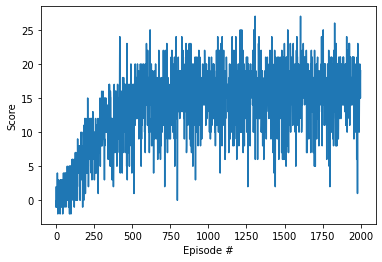

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()